### Import Packages

In [20]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np
from numpy import log
from pylab import rcParams
from sklearn import preprocessing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima.model_selection import train_test_split

### Functions

In [21]:
def plot_df(df):
  # Configure plot size and layout
  fig, ax = plt.subplots(figsize=(15, 5), layout='constrained')

  # Plot the dataset
  plt.plot(df)

  # Set x label
  plt.xlabel('Date')

  # Set y label
  plt.ylabel('Value')

In [22]:
def train_arima_model(df, train_size=0.8):
  # Split the data into training and testing sets
  train, test = train_test_split(df['sale_value'], train_size=train_size)

  # Run auto_arima to find best ARIMA model order
  auto_model = pm.auto_arima(y=train, start_p=0, start_q=0, max_p=3, max_q=3, max_order=None, trace=1)

  # Create the SARIMA model
  Final_model = ARIMA(train,
                      order=auto_model.order)
  Final_output = Final_model.fit()

  # Get the forecast for test data
  forecast = Final_output.get_forecast(steps = len(test))
  forecast_conf = forecast.conf_int()

  # Plot observed values
  fig, ax = plt.subplots(figsize=(15, 7), layout='constrained')
  ax = df['sale_value'].plot()

  # Plot forecasted values
  forecast.predicted_mean.plot(ax=ax, label='Forecast', color='red', alpha=0.9)

  # Plot the range for confidence intervals
  ax.fill_between(forecast_conf.index,
                  forecast_conf.iloc[:, 0],
                  forecast_conf.iloc[:, 1], color='g', alpha=0.1)

  # Set axes labels
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
  plt.show()

In [23]:
def sample_weekly(df, agg='mean'):
  if agg == 'mean':
    # Sample weekly values
    weekly_averages_mean = df['sale_value'].resample('W').mean()

    # reset the index
    weekly_averages_mean = weekly_averages_mean.reset_index()

    return weekly_averages_mean
  if agg == 'sum':
    # Set invoice as index
    df = df.set_index('invoice_date')

    # Sample weekly values
    weekly_averages_mean = df['sale_value'].resample('W').sum()

    # reset the index
    weekly_averages_mean = weekly_averages_mean.reset_index()

    return weekly_averages_mean

### DataFrames

In [24]:
# Read in the parquet file
daily_sales = pd.read_parquet('data/TX_AUS.parquet')

# Sample weekly average
weekly_averages = sample_weekly(daily_sales, agg='mean')

### Daily Sales interpolate

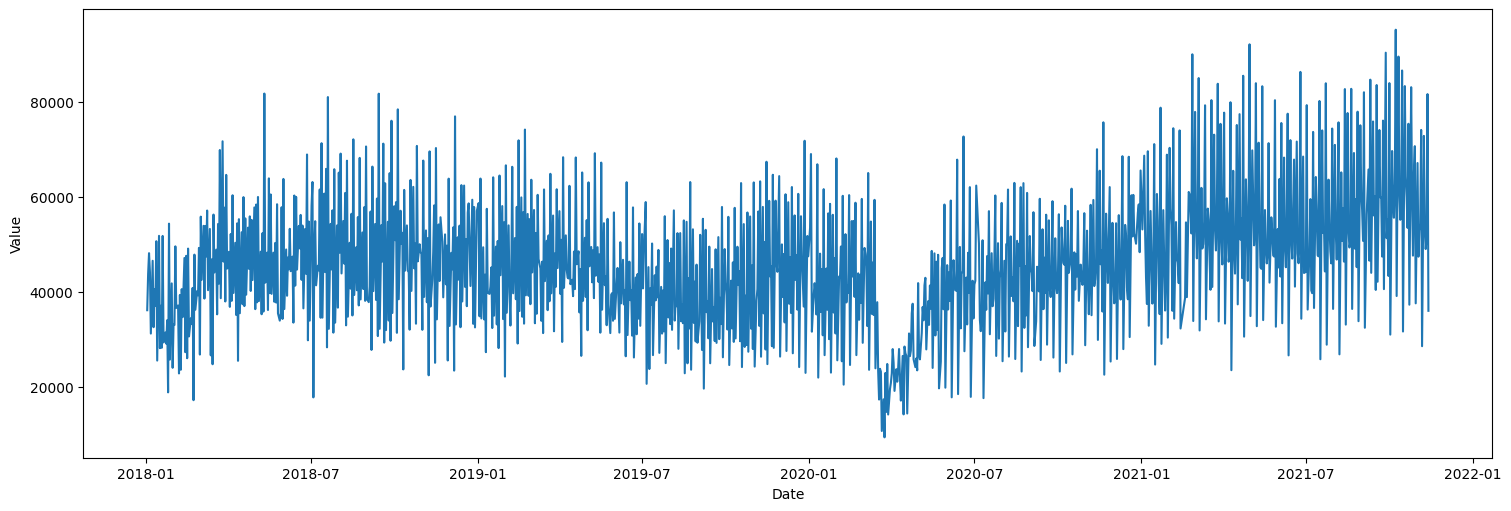

In [25]:
plot_df(daily_sales)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25393.208, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24656.263, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24304.484, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25391.209, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24086.473, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24068.384, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24345.708, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=24070.285, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24091.089, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24087.627, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=24206.486, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24203.959, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=24066.462, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=24084.322, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0

c:\Users\lmatt\Documents\Fall2024\DSCI402\Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\lmatt\Documents\Fall2024\DSCI402\Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\lmatt\Documents\Fall2024\DSCI402\Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


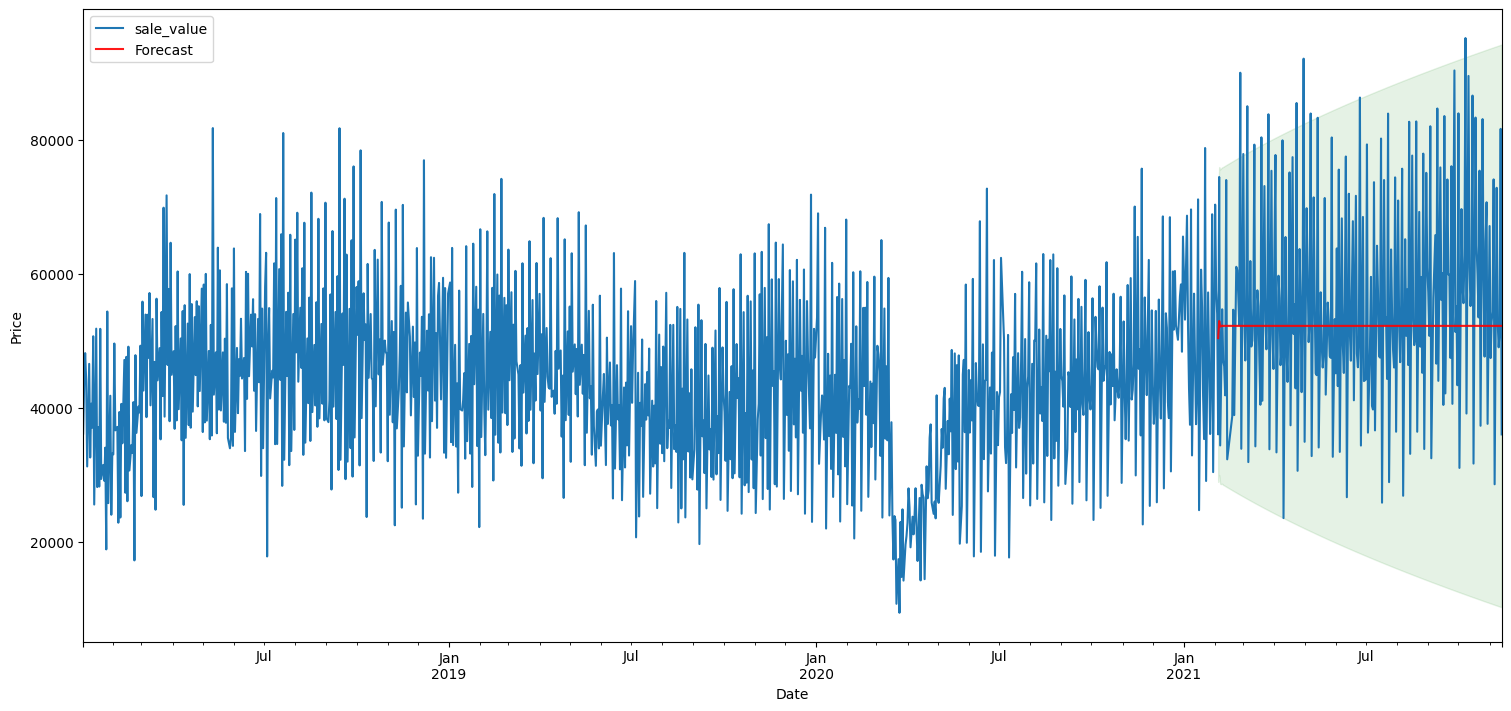

In [26]:
train_arima_model(daily_sales, train_size=0.8)

### Weekly Average interpolate

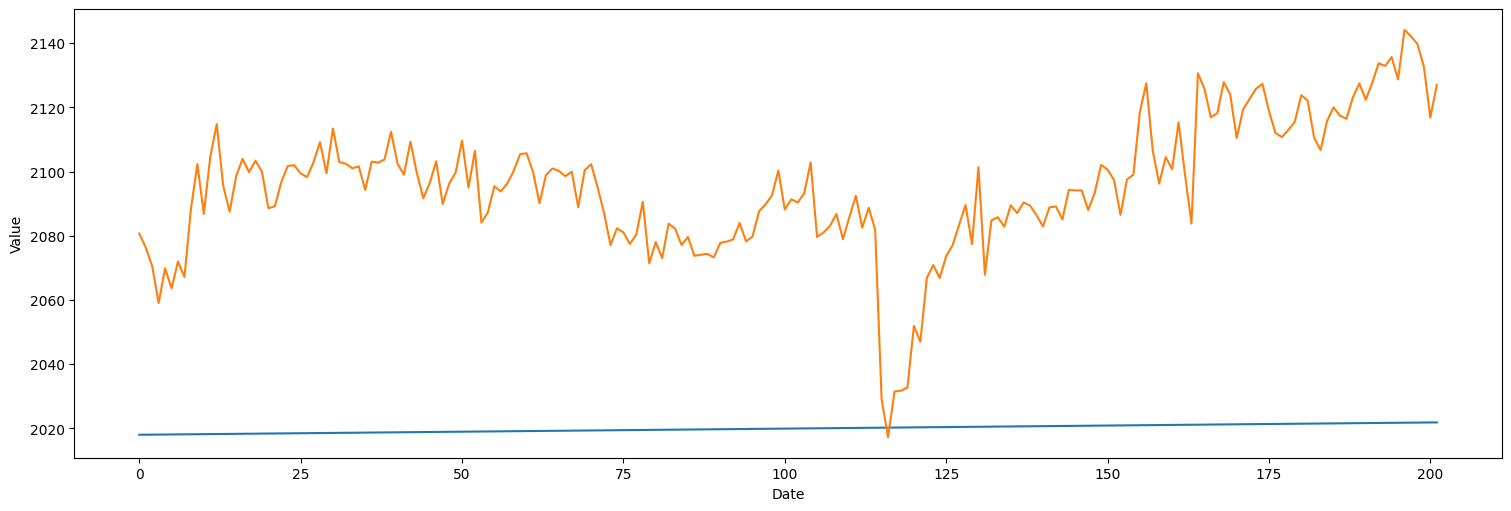

In [27]:
plot_df(weekly_averages)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3080.930, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3076.446, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3074.926, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3078.959, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3074.984, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3074.917, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3076.769, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3077.135, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3073.181, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3073.062, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3073.064, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3074.543, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3075.041, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]  

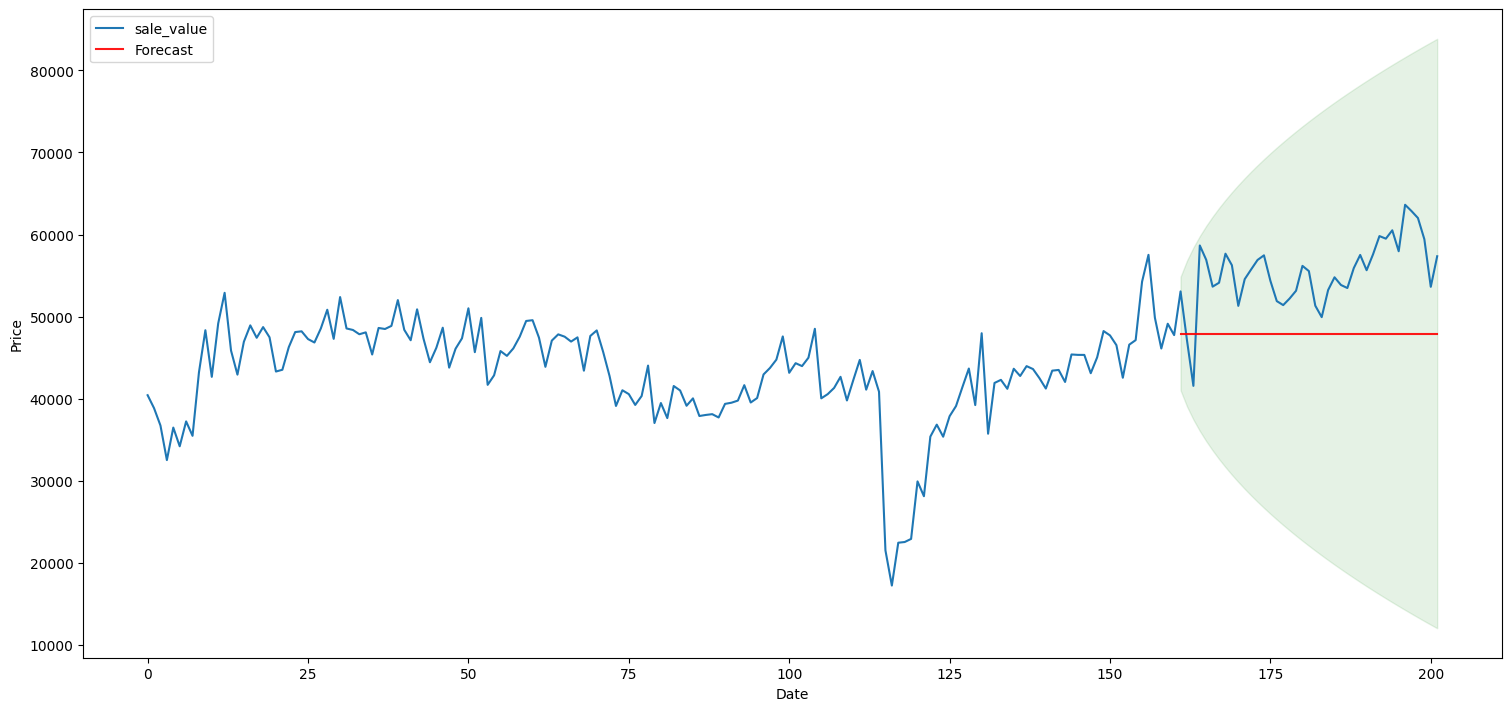

In [28]:
train_arima_model(weekly_averages, train_size=0.8)